# Spark Funds Investment 

### Main Goals of the Data Analysis are:
- Investment Type Analysis 
- Country Analysis
- Sector Analysis

In [6]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [13]:
# Reading data 
companies = pd.read_csv('companies.csv',encoding='ISO-8859-1')
rounds2 = pd.read_csv('rounds2.csv',encoding='ISO-8859-1')

In [11]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [15]:
companies.shape

(66368, 10)

In [17]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [14]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [18]:
rounds2.shape

(114949, 6)

In [19]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [31]:
companies.permalink=companies.permalink.str.lower()
print(len(companies.permalink.unique()))

66368


In [34]:
rounds2.company_permalink=rounds2.company_permalink.str.lower()
print(len(rounds2.company_permalink.unique()))

66370


There seem to be 2 extra permalinks in the rounds file which are not present in the companies file. Let's hope that this is a data quality issue, since if this were genuine, we have two companies whose investment round details are available but their metadata (company name, sector etc.) is not available in the companies table.

Let's have a look at the company permalinks which are in the 'rounds' file but not in 'companies'.

In [46]:
rounds2[~rounds2['company_permalink'].isin(companies['permalink'])]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/organization/e-cãbica,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN
31863,/organization/energystone-games-çµç³æ¸¸æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
58473,/organization/magnet-tech-ç£ç³ç§æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,NaN
109969,/organization/weiche-tech-åè½¦ç§æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,NaN
113839,/organization/zengame-ç¦ æ¸¸ç§æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN


There seems to be encoding problem.<br>Lets solve that and then find unique values 

In [50]:
companies.permalink=companies['permalink'].str.encode('utf-8').str.decode('ascii','ignore')
rounds2.company_permalink=rounds2['company_permalink'].str.encode('utf-8').str.decode('ascii','ignore')

In [51]:
print('Unique values in companies :',len(companies.permalink.unique()))
print('Unique values in rounds2 :',len(rounds2.company_permalink.unique()))

Unique values in companies : 66368
Unique values in rounds2 : 66368


In [53]:
# Merging the two dataframes

master_df=pd.merge(companies,rounds2,how='inner',left_on='permalink',right_on='company_permalink')
master_df.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [54]:
master_df.shape

(114949, 16)

In [55]:
master_df.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at',
       'company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd'],
      dtype='object')

In [60]:
# Removing company_permalink beacuse permalink and company_permalink are basiccaly same

master_df.drop('company_permalink',axis=1,inplace=True)

In [61]:
master_df.shape

(114949, 15)

#### Missing Values

In [64]:
round(master_df.isnull().sum()/master_df.shape[0]*100,2)

permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

Removing `funding_round_code` because it has lot of missing values. <br>
Also removing `founded_at`, `homepage_url`, `state_code`,'`region`,`city` because they is not needed for our business objective
 


In [67]:
master_df.drop(['funding_round_code','founded_at','homepage_url','state_code','region','city'],axis=1,inplace=True)

In [68]:
round(master_df.isnull().sum()/master_df.shape[0]*100,2)

permalink                   0.00
name                        0.00
category_list               2.97
status                      0.00
country_code                7.55
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

In [70]:
master_df['raised_amount_usd'].describe()

count    9.495900e+04
mean     1.042687e+07
std      1.148212e+08
min      0.000000e+00
25%      3.225000e+05
50%      1.680511e+06
75%      7.000000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

It's better to remove missing values than importing it with mean or median

In [82]:
master_df=master_df[~(master_df['raised_amount_usd'].isnull())]

In [84]:
master_df.country_code.value_counts()

USA    62049
GBR     5019
CAN     2616
CHN     1927
IND     1649
       ...  
SOM        1
PSE        1
LAO        1
TGO        1
DZA        1
Name: country_code, Length: 134, dtype: int64

In [87]:
master_df=master_df[~master_df['country_code'].isnull()]

In [88]:
round(master_df.isnull().sum()/len(master_df)*100,2)

permalink                  0.00
name                       0.00
category_list              0.65
status                     0.00
country_code               0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

In [90]:
master_df=master_df[~master_df['category_list'].isnull()]

In [92]:
round(master_df.isnull().sum()/len(master_df)*100,2)

permalink                  0.0
name                       0.0
category_list              0.0
status                     0.0
country_code               0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
dtype: float64

We have removed all the columns with missing values since number of rows with missing values was not very significant

## Investment Type Analysis

In [93]:
master_df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
6,/organization/01games-technology,01Games Technology,Games,operating,HKG,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,41250.0
7,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0


In [96]:
master_df['funding_round_type'].astype('category').value_counts()

venture                  47809
seed                     21095
debt_financing            6506
angel                     4400
grant                     1939
private_equity            1820
undisclosed               1345
convertible_note          1320
equity_crowdfunding       1128
post_ipo_equity            598
product_crowdfunding       330
post_ipo_debt              151
non_equity_assistance       60
secondary_market            28
Name: funding_round_type, dtype: int64

In [104]:
# We want to choose from only four investment types : angel,seed,venture,private_equity

df=master_df[master_df['funding_round_type'].isin(['angel','seed','venture','private_equity'])]
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
7,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0


In [105]:
df.funding_round_type.value_counts()

venture           47809
seed              21095
angel              4400
private_equity     1820
Name: funding_round_type, dtype: int64

In [107]:
df.groupby('funding_round_type')['raised_amount_usd'].mean()

funding_round_type
angel             9.715739e+05
private_equity    7.393849e+07
seed              7.477937e+05
venture           1.172422e+07
Name: raised_amount_usd, dtype: float64

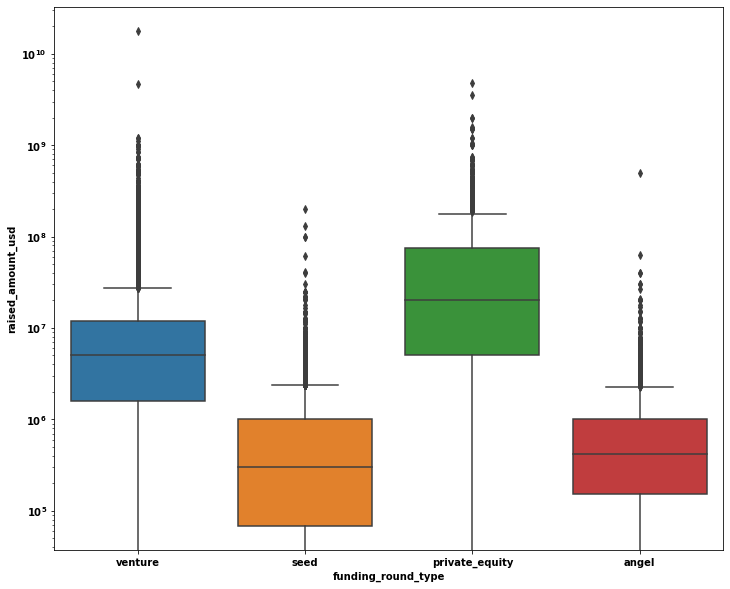

In [111]:
plt.figure(figsize=(12,10))
sns.boxplot(x='funding_round_type',y='raised_amount_usd',data=df)
plt.yscale('log')

In [115]:
df.pivot_table(columns= 'funding_round_type',values='raised_amount_usd',aggfunc=['mean','median'])

mean                                              \
funding_round_type          angel private_equity           seed       venture   
raised_amount_usd   971573.891136   7.393849e+07  747793.682484  1.172422e+07   

                      median                                      
funding_round_type     angel private_equity      seed    venture  
raised_amount_usd   414906.0     20000000.0  300000.0  5000000.0

In [118]:
df.groupby('funding_round_type')['raised_amount_usd'].median().sort_values()

funding_round_type
seed                300000.0
angel               414906.0
venture            5000000.0
private_equity    20000000.0
Name: raised_amount_usd, dtype: float64

Since the company wants to invest between 5 and 15 million. `Venture` will be the most appropriate investment type for the company.

In [121]:
df=df[df['funding_round_type']=='venture']
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0
10,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0
11,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0


## Country Analysis

In [126]:
top_countries=df.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)
top_countries

country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
           ...     
MCO    6.570000e+05
SAU    5.000000e+05
CMR    3.595610e+05
GTM    3.000000e+05
MMR    2.000000e+05
Name: raised_amount_usd, Length: 97, dtype: float64

In [128]:
top9=top_countries[:9]
top9

country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
FRA    7.226851e+09
ISR    6.854350e+09
DEU    6.306922e+09
JPN    3.167647e+09
Name: raised_amount_usd, dtype: float64

Top 3 English speaking countries are : `USA`,`GBR`,`IND`.

In [131]:
df=df[df.country_code.isin(['USA','GBR','IND'])]
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
10,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0
11,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0
12,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0
22,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0


## Sector Analysis

In [139]:
df['primary']=df['category_list'].str.split("|",expand=True)[0]
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media
10,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,Analytics
11,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,Analytics
12,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,Analytics
22,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,Apps


In [188]:
df['primary']=df['primary'].str.lower()

In [189]:
mapping=pd.read_csv('mapping.csv')
mapping

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0


In [192]:
mapping=mapping[~mapping.isnull()]

In [195]:
mapping.drop('Blanks',axis=1,inplace=True)

In [197]:
mapping['category_list']=mapping['category_list'].str.lower()

In [200]:
mapping.drop(0,inplace=True)

In [201]:
mapping.head()

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3d,0,0,0,0,1,0,0,0
2,3d printing,0,0,0,0,1,0,0,0
3,3d technology,0,0,0,0,1,0,0,0
4,accounting,0,0,0,0,0,0,0,1
5,active lifestyle,0,0,0,1,0,0,0,0


In [204]:
def main_sector(x):
    
    for i in mapping.columns:
        if x[i]==1:
            return i

In [214]:
mapping['main_sectors']=mapping.apply(main_sector,axis=1)
mapping.head()

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",main_sectors
1,3d,0,0,0,0,1,0,0,0,Manufacturing
2,3d printing,0,0,0,0,1,0,0,0,Manufacturing
3,3d technology,0,0,0,0,1,0,0,0,Manufacturing
4,accounting,0,0,0,0,0,0,0,1,"Social, Finance, Analytics, Advertising"
5,active lifestyle,0,0,0,1,0,0,0,0,Health


In [215]:
# values in primary column in df which are not in the category_list column in mapping file
df[~df['primary'].isin(mapping['category_list'])]

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary
10,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,analytics
11,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,analytics
12,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,analytics
61,/organization/100plus,100Plus,Analytics,acquired,USA,/funding-round/b5facb0d9dea2f0352b5834892c88c53,venture,02-11-2011,500000.0,analytics
198,/organization/1world-online,1World Online,Analytics|Big Data|Enterprise Software|Market ...,operating,USA,/funding-round/32936e588a134502712877150198a0b3,venture,13-08-2015,2500000.0,analytics
...,...,...,...,...,...,...,...,...,...,...
114632,/organization/zoopla,Zoopla,Property Management|Real Estate,ipo,GBR,/funding-round/98da1f441a55c9a9629a256828923e38,venture,19-01-2009,5440000.0,property management
114660,/organization/zopa,Zopa,Finance|FinTech,operating,GBR,/funding-round/2a55d435c3433d8f903526c050c19361,venture,20-03-2007,12900000.0,finance
114661,/organization/zopa,Zopa,Finance|FinTech,operating,GBR,/funding-round/4b0740cb83da8d2af9d221e5455f8923,venture,01-03-2006,15000000.0,finance
114663,/organization/zopa,Zopa,Finance|FinTech,operating,GBR,/funding-round/54dbfbd899caf7d1d4b2b7676065f303,venture,01-07-2006,5000000.0,finance


In [216]:
# values in the category_list column which are not in primary column
mapping[~mapping['category_list'].isin(df['primary'])]

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",main_sectors
16,air pollution control,0,1,0,0,0,0,0,0,Cleantech / Semiconductors
20,alter0tive medicine,0,0,0,1,0,0,0,0,Health
22,a0lytics,0,0,0,0,0,0,0,1,"Social, Finance, Analytics, Advertising"
33,aquaculture,0,1,0,0,0,0,0,0,Cleantech / Semiconductors
49,b2b express delivery,0,0,0,0,0,0,0,1,"Social, Finance, Analytics, Advertising"
...,...,...,...,...,...,...,...,...,...,...
670,virtual workforces,0,0,1,0,0,0,0,0,Entertainment
672,waste ma0gement,0,1,0,0,0,0,0,0,Cleantech / Semiconductors
682,weddings,0,0,1,0,0,0,0,0,Entertainment
683,wholesale,0,0,0,0,0,0,1,0,Others


If you see carefully, you'll notice something fishy - there are sectors named *alter0tive medicine*, *a0lytics*, *waste ma0gement*, *veteri0ry*, etc. This is not a *random* quality issue, but rather a pattern. In some strings, the 'na' has been replaced by '0'. This is weird - maybe someone was trying to replace the 'NA' values with '0', and ended up doing this. 

Let's treat this problem by replacing '0' with 'na' in the ```category_list``` column.

In [218]:
# Replacing 0 with na 
mapping['category_list']=mapping['category_list'].apply(lambda x:x.replace('0','na'))

In [221]:
df=pd.merge(df,mapping[['category_list','main_sectors']],how='inner',left_on='primary',right_on='category_list')
df.head()

,permalink,name,category_list_x,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary,category_list_y,main_sectors
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,media,media,Entertainment
1,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,media,media,Entertainment
2,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,media,media,Entertainment
3,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,media,media,Entertainment
4,/organization/all-def-digital,All Def Digital,Media,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,media,media,Entertainment


In [225]:
df.drop(['primary','category_list_y','category_list_x'],axis=1,inplace=True)

In [226]:
df.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_sectors
0,/organization/-fame,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Entertainment
1,/organization/90min,90min,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,Entertainment
2,/organization/90min,90min,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,Entertainment
3,/organization/90min,90min,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,Entertainment
4,/organization/all-def-digital,All Def Digital,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,Entertainment


In [228]:
df=df[(df.raised_amount_usd>=5000000)&(df.raised_amount_usd<=15000000)]
df.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_sectors
0,/organization/-fame,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Entertainment
1,/organization/90min,90min,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,Entertainment
2,/organization/90min,90min,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,Entertainment
4,/organization/all-def-digital,All Def Digital,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,Entertainment
14,/organization/chefs-feed,ChefsFeed,operating,USA,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,26-02-2015,5000000.0,Entertainment


In [241]:
# Country - IND
df[df['country_code']=='IND'].groupby('main_sectors')['raised_amount_usd'].agg(['count','sum']).sort_values(by='sum',ascending=False)

,count,sum
main_sectors,,
Others,110,1.013410e+09
"Social, Finance, Analytics, Advertising",60,5.505496e+08
"News, Search and Messaging",52,4.338345e+08
Entertainment,33,2.808300e+08
Manufacturing,21,2.009000e+08
Health,19,1.677400e+08
Cleantech / Semiconductors,20,1.653800e+08
Automotive & Sports,13,1.369000e+08


In [240]:
# Country - USA
df[df['country_code']=='USA'].groupby('main_sectors')['raised_amount_usd'].agg(['count','sum']).sort_values(by='sum',ascending=False)

,count,sum
main_sectors,,
Others,2950,2.632101e+10
"Social, Finance, Analytics, Advertising",2714,2.380738e+10
Cleantech / Semiconductors,2350,2.163343e+10
"News, Search and Messaging",1583,1.397157e+10
Health,909,8.211859e+09
Manufacturing,799,7.258553e+09
Entertainment,591,5.099198e+09
Automotive & Sports,167,1.454104e+09


In [242]:
# Country - GBR
df[df['country_code']=='GBR'].groupby('main_sectors')['raised_amount_usd'].agg(['count','sum']).sort_values(by='sum',ascending=False)

,count,sum
main_sectors,,
Others,147,1.283624e+09
Cleantech / Semiconductors,130,1.163990e+09
"Social, Finance, Analytics, Advertising",133,1.089404e+09
"News, Search and Messaging",73,6.157462e+08
Entertainment,56,4.827847e+08
Manufacturing,42,3.619403e+08
Health,24,2.145375e+08
Automotive & Sports,16,1.670516e+08
